In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

#Funciones utilizadas------------------------------------

#Diagonalización tridiagonales
def diagonalizar_tridiagonal_simetrica(diagonal_principal, diagonal_superior):
    # Calcular autovalores y autovectores
    autovalores, autovectores = eigh_tridiagonal(diagonal_principal, diagonal_superior, eigvals_only=False)
    return autovalores,autovectores

#Medir tiempo
start_time = time.time()
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

def energ_estados(N, h, K, eps):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)

    # Matriz S_z
    S_z = np.diag(Ms)

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x
    S_x=1/2 * (S_mas + S_menos)

    # Hamiltoniano
    J = 1
    H = -(4 * J) / N * np.diag(Ms**2) - 2 * h * S_x + eps * S_z -(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms)

    # Diagonalización
    autoenergias, autovectores = np.linalg.eigh(H)
    return autoenergias, autovectores

El tiempo de ejecución fue: 0.000030 segundos


In [19]:
def distribucion_energias(N,h0,hf,K0,Kf,eps0,eps1):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
#Autovalores y autoestados en ambos hamiltonianos
    energ1, auto1 = energ_estados(N, h0,K0, eps0)
    energ2, auto2 = energ_estados(N, hf,Kf, eps1)

# Cambio de base
    U = auto2.T @ auto1

# Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c
    prob=np.abs(d)**2

#Magnetización
    magn=[]
    for i in range(int(N+1)):
        magn.append((auto2[:,i] @ (Ms*auto2[:,i]).T)*1/(N/2))
        
    plt.plot(energ2/(N),prob,'.')
    plt.xlabel(r"$E_{n}$")
    plt.ylabel("Probability")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.grid()
    
    return

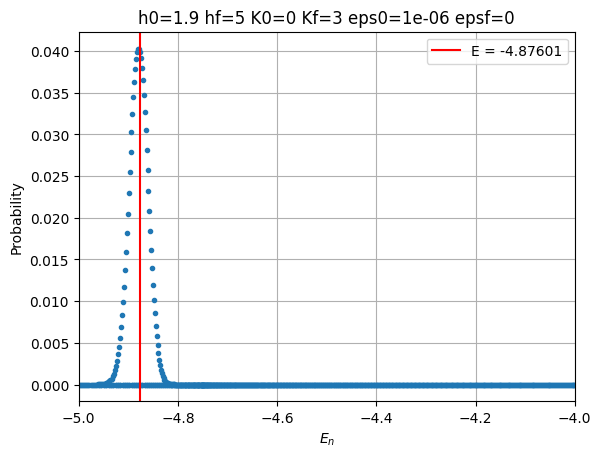

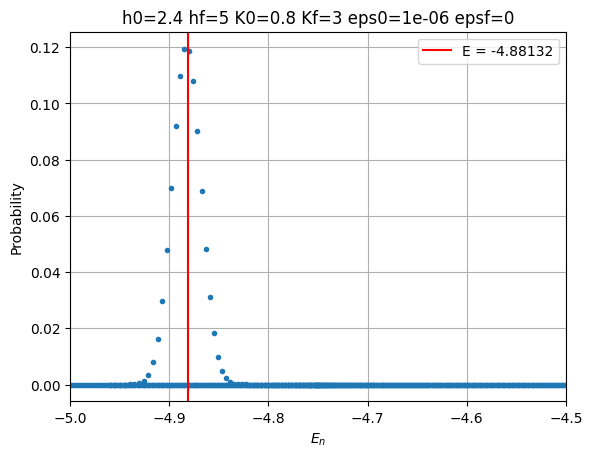

In [20]:
distribucion_energias(3500,1.9, 5,0,3,1e-6, 0)
plt.axvline(x=-9.75203659564441/2, color='red',label='E = -4.87601')
plt.legend()
plt.xlim([-5,-4])
plt.show()
distribucion_energias(3500,2.4, 5,0.8,3,1e-6, 0)
plt.axvline(x=-9.762643162755834/2, color='red',label='E = -4.88132')
plt.legend()
plt.xlim([-5,-4])
plt.show()

In [19]:
def distribucion_energias(ax, N, h0, hf, K0, Kf, eps0, eps1, energy_line=None, xlim=None):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)

    # Autovalores y autoestados
    energ1, auto1 = energ_estados(N, h0, K0, eps0)
    energ2, auto2 = energ_estados(N, hf, Kf, eps1)

    # Cambio de base
    U = auto2.T @ auto1

    # Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c
    prob = np.abs(d)**2

    # Magnetización (aunque no se usa en el plot actual)
    magn = [(auto2[:, i] @ (Ms * auto2[:, i]).T) * 1 / (N / 2) for i in range(N + 1)]

    # Plot
    ax.plot(energ2 / N, prob, '.')
    ax.set_xlabel(r"$E_{n}$")
    ax.set_ylabel("Probability")
    ax.set_title("Distribución energética")


    if energy_line is not None:
        ax.axvline(x=energy_line, color='red', label=f"E = {energy_line:.5f}")
        ax.legend()
    if xlim is not None:
        ax.set_xlim(xlim)
    ax.grid()


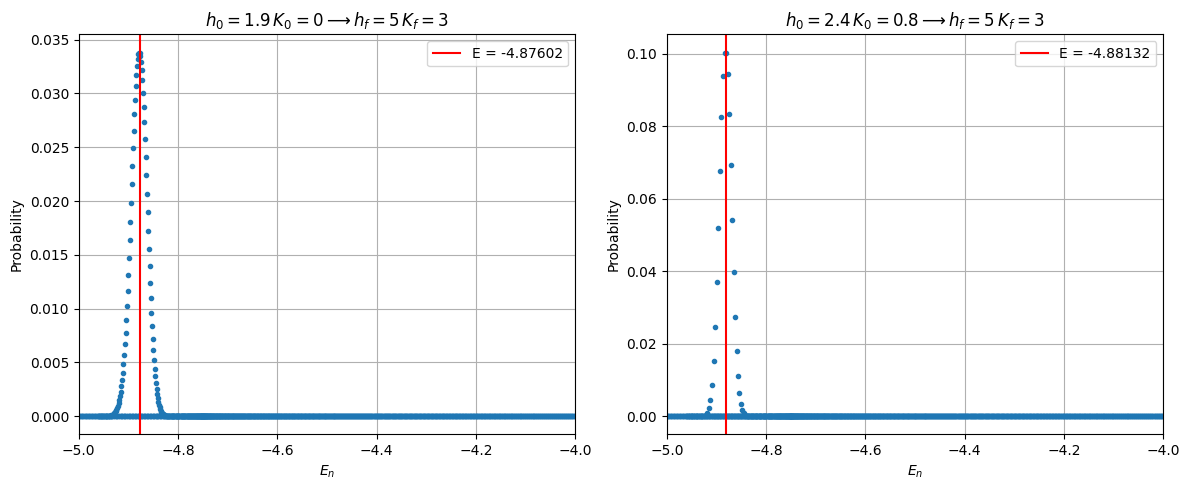

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primer subplot
distribucion_energias(axs[0], 5000, 1.9, 5, 0, 3, 1e-6, 0,
                      energy_line=-9.75203659564441 / 2,
                      xlim=[-5, -4])

# Segundo subplot
distribucion_energias(axs[1], 5000, 2.4, 5, 0.8, 3, 1e-6, 0,
                      energy_line=-9.762643162755834 / 2,
                      xlim=[-5, -4])

plt.tight_layout()
plt.show()


In [20]:
def evolution_time(ax, h0, hf, K0, Kf, eps0, eps1, t0, tf, p, N):
    energ1, auto1 = energ_estados(N, h0, K0, eps0)
    energ2, auto2 = energ_estados(N, hf, Kf, eps1)

    # Cambio de base
    U = auto2.T @ auto1

    # Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c

    # Precálculos
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
    sz_matrix = np.tensordot(auto2.T, (Ms[:, None] * auto2), axes=([1], [0]))

    energy_diff = energ2[:, None] - energ2[None, :]
    d_d_conj = np.outer(np.conjugate(d[:, 0]), d[:, 0])

    tp = np.linspace(t0, tf, p)
    S_zm = [
        np.sum(sz_matrix * np.exp(-1j * energy_diff * t) * d_d_conj).real / (N / 2)
        for t in tp
    ]

    ax.plot(tp, S_zm)
    ax.set_xlabel("t")
    ax.set_ylabel(r"$S_{z}$")
    ax.set_title("Evolución temporal")
    ax.grid()


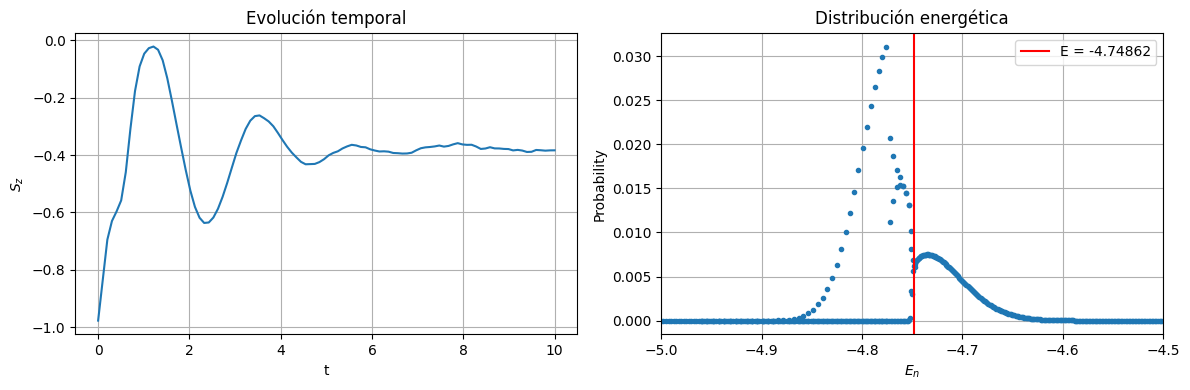

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Primera gráfica: evolución temporal
evolution_time(axs[0], 0.4212710032795302, 5, 0, 3, 1e-6, 0, 0, 10, 100, 5000)


# Segunda gráfica: distribución de energías
distribucion_energias(axs[1], 3000, 0.4212710032795302, 5, 0, 3, 1e-6, 0,
                      energy_line=-9.49725 / 2,
                      xlim=[-5, -4.5])

plt.tight_layout()
plt.show()

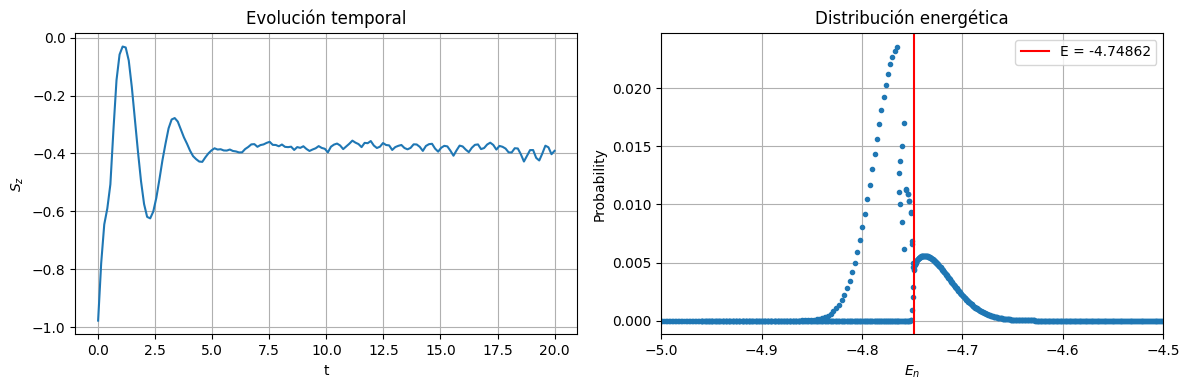

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Primera gráfica: evolución temporal
evolution_time(axs[0], 0.4212710032795302, 5, 0, 3, 1e-6, 0, 0, 20, 150, 3000)


# Segunda gráfica: distribución de energías
distribucion_energias(axs[1], 5000, 0.4212710032795302, 5, 0, 3, 1e-6, 0,
                      energy_line=-9.49725 / 2,
                      xlim=[-5, -4.5])

plt.tight_layout()
plt.show()